# Task 2: Data Acquisition & Initial Visualization

You may use the provided USGS streamflow datasets or a time-series dataset of your own choosing, provided it has at least daily resolution.

Load Data: Read the raw data into a Pandas DataFrame from your  data/ folder.

Process the data: Subset the data so that all of the data is overlapping and is 6 years in length.
Exploratory Data Analysis (EDA): Create an initial time-series plot of the data, ensure the plot has a title, axes labels, legend. etc. Create a figure with four subplots to visualize the data.

Compare and Contrast: How do the different streams compare (timing, magnitude, other)?




In [1]:
# Import Packages

import pandas as pd
import matplotlib.pyplot as plt
import os

#### Load Data

In [3]:
# Example for one file
df = pd.read_csv("../data/raw/09289500_1980_2020.csv")
print(df.head())  
print(df.columns)       


     Datetime  USGS_flow    variable  USGS_ID measurement_unit     qualifiers  \
0  1984-10-01      84.15  streamflow  9289500            ft3/s          ['A']   
1  1984-10-02        NaN  streamflow  9289500            ft3/s          ['A']   
2  1984-10-03        NaN  streamflow  9289500            ft3/s          ['A']   
3  1984-10-04        NaN  streamflow  9289500            ft3/s          ['A']   
4  1984-10-05        NaN  streamflow  9289500            ft3/s  ['A', '[91]']   

   series  
0       0  
1       0  
2       0  
3       0  
4       0  
Index(['Datetime', 'USGS_flow', 'variable', 'USGS_ID', 'measurement_unit',
       'qualifiers', 'series'],
      dtype='object')


In [5]:
# Define file paths and labels
files = {
    "Lake Fork River": "../data/raw/09289500_1980_2020.csv",
    "Green River": "../data/raw/09261000_1980_2020.csv",
    "Colorado River Potash": "../data/raw/09185600_1980_2020.csv",
    "Colorado River Cisco": "../data/raw/09180500_1980_2020.csv"
}

# Read CSVs into a dictionary of DataFrames
data = {label: pd.read_csv(path, parse_dates=['Datetime'], index_col='Datetime') 
        for label, path in files.items()}

# Quick check
for label, df in data.items():
    print(label, df.shape)
    print(df.head(1))
    print(" ")


Lake Fork River (13110, 6)
            USGS_flow    variable  USGS_ID measurement_unit qualifiers  series
Datetime                                                                      
1984-10-01      84.15  streamflow  9289500            ft3/s      ['A']       0
 
Green River (14610, 6)
            USGS_flow    variable  USGS_ID measurement_unit     qualifiers  \
Datetime                                                                     
1980-09-30     1320.0  streamflow  9261000            ft3/s  ['A', '[91]']   

            series  
Datetime            
1980-09-30       0  
 
Colorado River Potash (2162, 6)
            USGS_flow    variable  USGS_ID measurement_unit qualifiers  series
Datetime                                                                      
2014-10-30   4510.278  streamflow  9185600            ft3/s      ['A']       0
 
Colorado River Cisco (12418, 6)
            USGS_flow    variable  USGS_ID measurement_unit     qualifiers  \
Datetime                      

#### Find most recent contiuous 6 year period

In [9]:
# Loop through datasets to inspect date ranges and gaps
for label, df in data.items():
    print(f"=== {label} ===")
    
    first_date = df.index.min()
    last_date  = df.index.max()
    print("First date:", first_date.date())
    print("Last date: ", last_date.date())
    
    # Compute gaps in days between consecutive rows
    gaps = df.index.to_series().diff().dt.days
    large_gaps = gaps[gaps > 1]
    
    if not large_gaps.empty:
        print("Gaps > 1 day found on these dates:")
        for date, gap in large_gaps.items():
            print(f"  {date.date()} (gap of {int(gap)} days)")
    else:
        print("No gaps > 1 day")
    
    print(" ")


=== Lake Fork River ===
First date: 1984-10-01
Last date:  2020-09-29
Gaps > 1 day found on these dates:
  1990-10-20 (gap of 39 days)
 
=== Green River ===
First date: 1980-09-30
Last date:  2020-09-29
No gaps > 1 day
 
=== Colorado River Potash ===
First date: 2014-10-30
Last date:  2020-09-29
No gaps > 1 day
 
=== Colorado River Cisco ===
First date: 1986-10-01
Last date:  2020-09-29
No gaps > 1 day
 


In [10]:
# Define 6-year period
subset_start = pd.Timestamp("2014-10-30")
subset_end   = pd.Timestamp("2020-9-29")

# Subset all datasets
data_6yr = {label: df.loc[subset_start:subset_end] for label, df in data.items()}

# Confirm shapes and date ranges
for label, df in data_6yr.items():
    print(f"{label}: {df.shape}, {df.index.min().date()} to {df.index.max().date()}")

Lake Fork River: (2162, 6), 2014-10-30 to 2020-09-29
Green River: (2162, 6), 2014-10-30 to 2020-09-29
Colorado River Potash: (2162, 6), 2014-10-30 to 2020-09-29
Colorado River Cisco: (2162, 6), 2014-10-30 to 2020-09-29


#### Single Plot

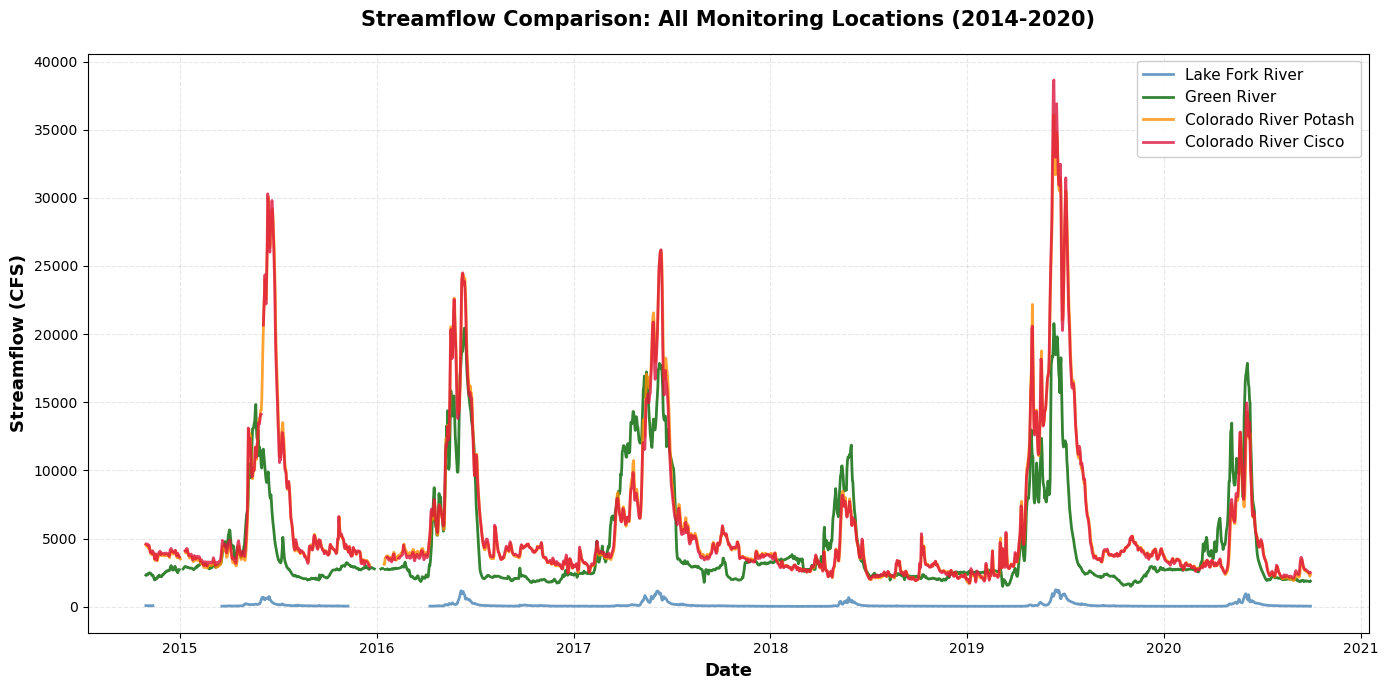

In [12]:
fig, ax = plt.subplots(figsize=(14, 7))

# Define colors for each stream
colors = {'Lake Fork River': 'steelblue', 'Green River': 'darkgreen', 
          'Colorado River Potash': 'darkorange', 'Colorado River Cisco': 'crimson'}

# Plot all streams
for label, df in data_6yr.items():
    ax.plot(df.index, df['USGS_flow'], label=label, linewidth=2, color=colors[label], alpha=0.8)

# Formatting
ax.set_xlabel('Date', fontsize=13, fontweight='bold')
ax.set_ylabel('Streamflow (CFS)', fontsize=13, fontweight='bold')
ax.set_title('Streamflow Comparison: All Monitoring Locations (2014-2020)', 
             fontsize=15, fontweight='bold', pad=20)
ax.legend(loc='upper right', fontsize=11, framealpha=0.95)
ax.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


#### Multiple Plots

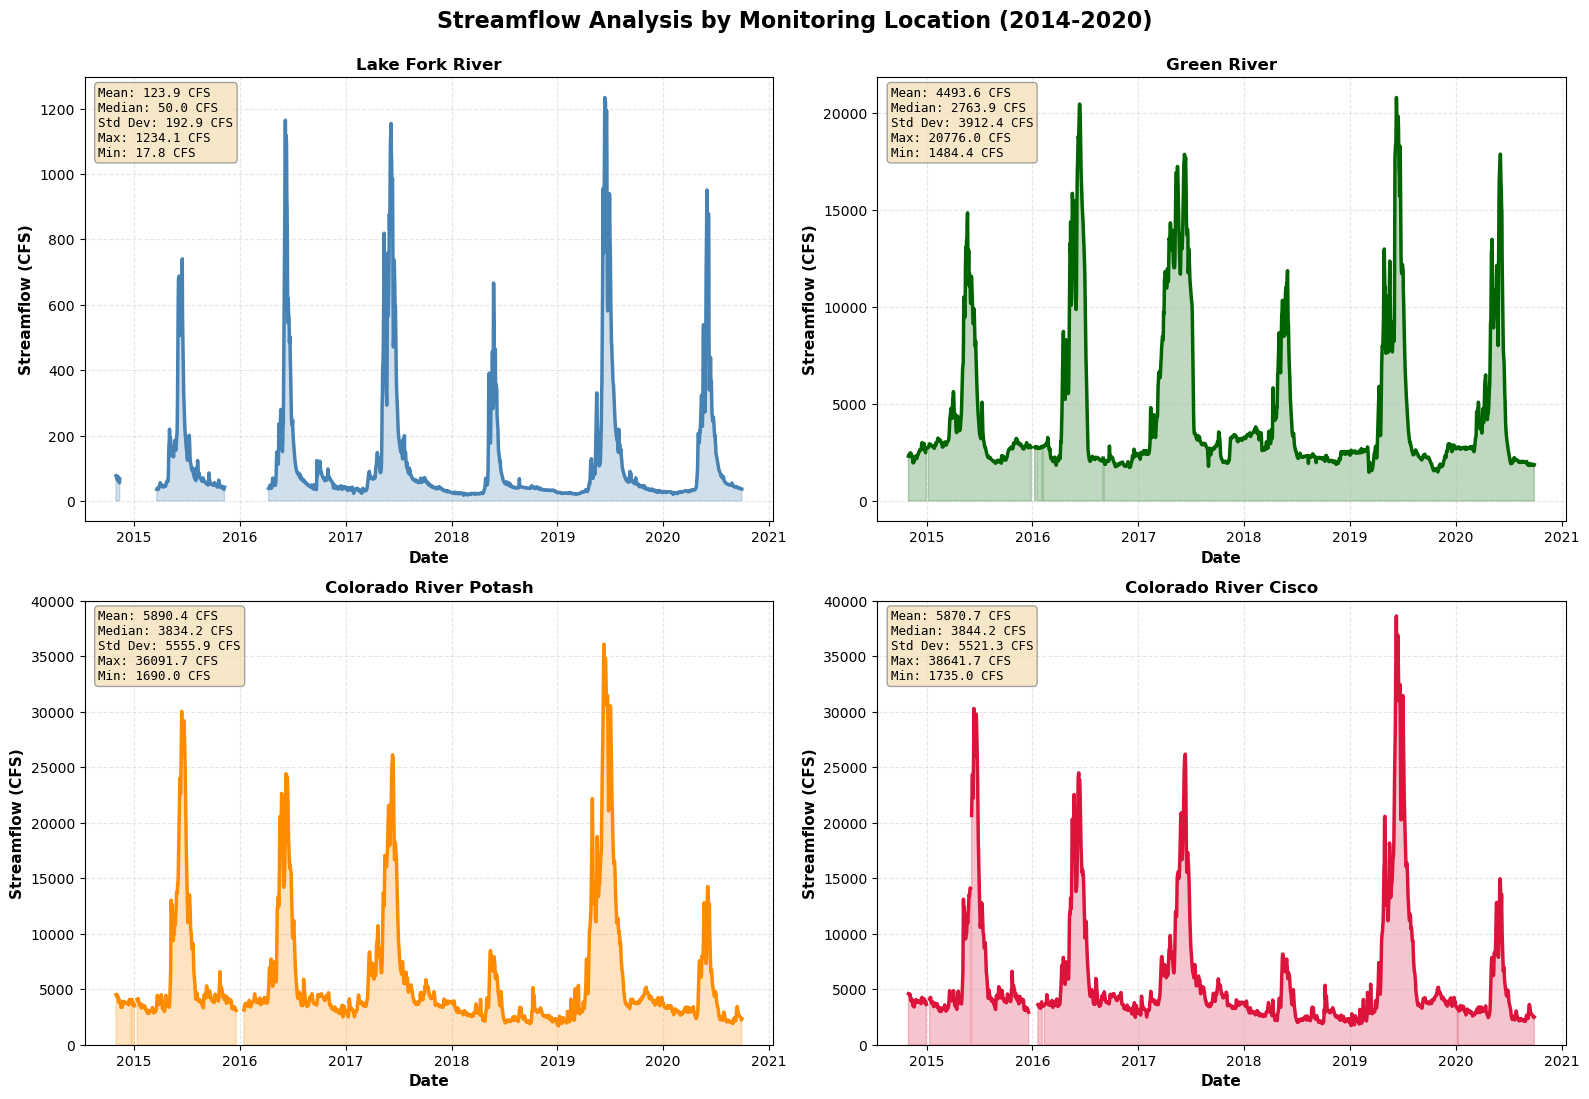

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(16, 11))
fig.suptitle('Streamflow Analysis by Monitoring Location (2014-2020)', 
             fontsize=16, fontweight='bold', y=0.995)

streams_list = list(data_6yr.keys())
colors_list = list(colors.values())

for idx, (stream, ax, color) in enumerate(zip(streams_list, axes.flat, colors_list)):
    df = data_6yr[stream]
    
    # Plot streamflow with filled area
    ax.plot(df.index, df['USGS_flow'], color=color, linewidth=2.5, label=stream)
    ax.fill_between(df.index, df['USGS_flow'], alpha=0.25, color=color)

    # Set y-axis range for bottom row plots
    if idx >= 2:
        ax.set_ylim(0, 40000)
    
    # Formatting
    ax.set_xlabel('Date', fontsize=11, fontweight='bold')
    ax.set_ylabel('Streamflow (CFS)', fontsize=11, fontweight='bold')
    ax.set_title(stream, fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.tick_params(axis='both', labelsize=10)
    
    # Calculate and display statistics
    mean_flow = df['USGS_flow'].mean()
    max_flow = df['USGS_flow'].max()
    min_flow = df['USGS_flow'].min()
    median_flow = df['USGS_flow'].median()
    std_flow = df['USGS_flow'].std()
    
    stats_text = (f'Mean: {mean_flow:.1f} CFS\n'
                  f'Median: {median_flow:.1f} CFS\n'
                  f'Std Dev: {std_flow:.1f} CFS\n'
                  f'Max: {max_flow:.1f} CFS\n'
                  f'Min: {min_flow:.1f} CFS')
    
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=9, 
            verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7, edgecolor='gray'))

plt.tight_layout()
plt.show()


#### Printed Stats

In [16]:
print("\nStreamflow Statistics Summary:")
print("="*80)
for stream in streams_list:
    df = data_6yr[stream]
    print(f"\n{stream}:")
    print(f"  Mean:      {df['USGS_flow'].mean():>10.2f} CFS")
    print(f"  Median:    {df['USGS_flow'].median():>10.2f} CFS")
    print(f"  Std Dev:   {df['USGS_flow'].std():>10.2f} CFS")
    print(f"  Min:       {df['USGS_flow'].min():>10.2f} CFS")
    print(f"  Max:       {df['USGS_flow'].max():>10.2f} CFS")
    print(f"  Range:     {df['USGS_flow'].max() - df['USGS_flow'].min():>10.2f} CFS")
print("="*80)


Streamflow Statistics Summary:

Lake Fork River:
  Mean:          123.93 CFS
  Median:         50.04 CFS
  Std Dev:       192.95 CFS
  Min:            17.75 CFS
  Max:          1234.06 CFS
  Range:        1216.31 CFS

Green River:
  Mean:         4493.62 CFS
  Median:       2763.85 CFS
  Std Dev:      3912.45 CFS
  Min:          1484.36 CFS
  Max:         20776.04 CFS
  Range:       19291.68 CFS

Colorado River Potash:
  Mean:         5890.39 CFS
  Median:       3834.17 CFS
  Std Dev:      5555.88 CFS
  Min:          1690.00 CFS
  Max:         36091.67 CFS
  Range:       34401.67 CFS

Colorado River Cisco:
  Mean:         5870.71 CFS
  Median:       3844.17 CFS
  Std Dev:      5521.25 CFS
  Min:          1735.00 CFS
  Max:         38641.67 CFS
  Range:       36906.67 CFS


# Task 3: Temporal Resampling & Statistical Aggregation
Engineers often need to move between "instantaneous" values and "volumetric" averages. Use Pandas to resample your data.

    Weekly Mean: Resample the daily data to a Weekly mean.

    Monthly Volumetric: Resample the data to a Monthly total.

Visualization: Create a single multi-paneled figure comparing the three resolutions:

    Panel A: Daily (Raw)

    Panel B: Weekly Mean

    Panel C: Monthly Volume

    Panel D: Put the legend here

Ensure that all four streams are on each figure and labeled correctly, including a change of units, if necessary.

Compare and Contrast: How do the different streams compare (timing, magnitude, other), and how does the temporal resampling highlight similarities and differences between the streams?


#### Resample

In [32]:
# Weekly Mean
data_weekly = {}
for label, df in data_6yr.items():
    data_weekly[label] = df[['USGS_flow']].resample('W').mean()

# Monthly Total
data_monthly_taf = {}
for label, df in data_6yr.items():
    # Sum of daily flows over month (CFS × seconds/day)
    monthly_sum = df[['USGS_flow']].resample('ME').sum()
    
    # Conversions
    cubic_feet = monthly_sum * 86400
    acre_feet = cubic_feet / 43560
    taf = acre_feet / 1000
    
    data_monthly_taf[label] = taf

#print(f"Weekly mean shape: {data_weekly['Lake Fork River'].shape}")
#print(f"Monthly volumetric shape: {data_monthly['Lake Fork River'].shape}")

#### 4 Panel Figure

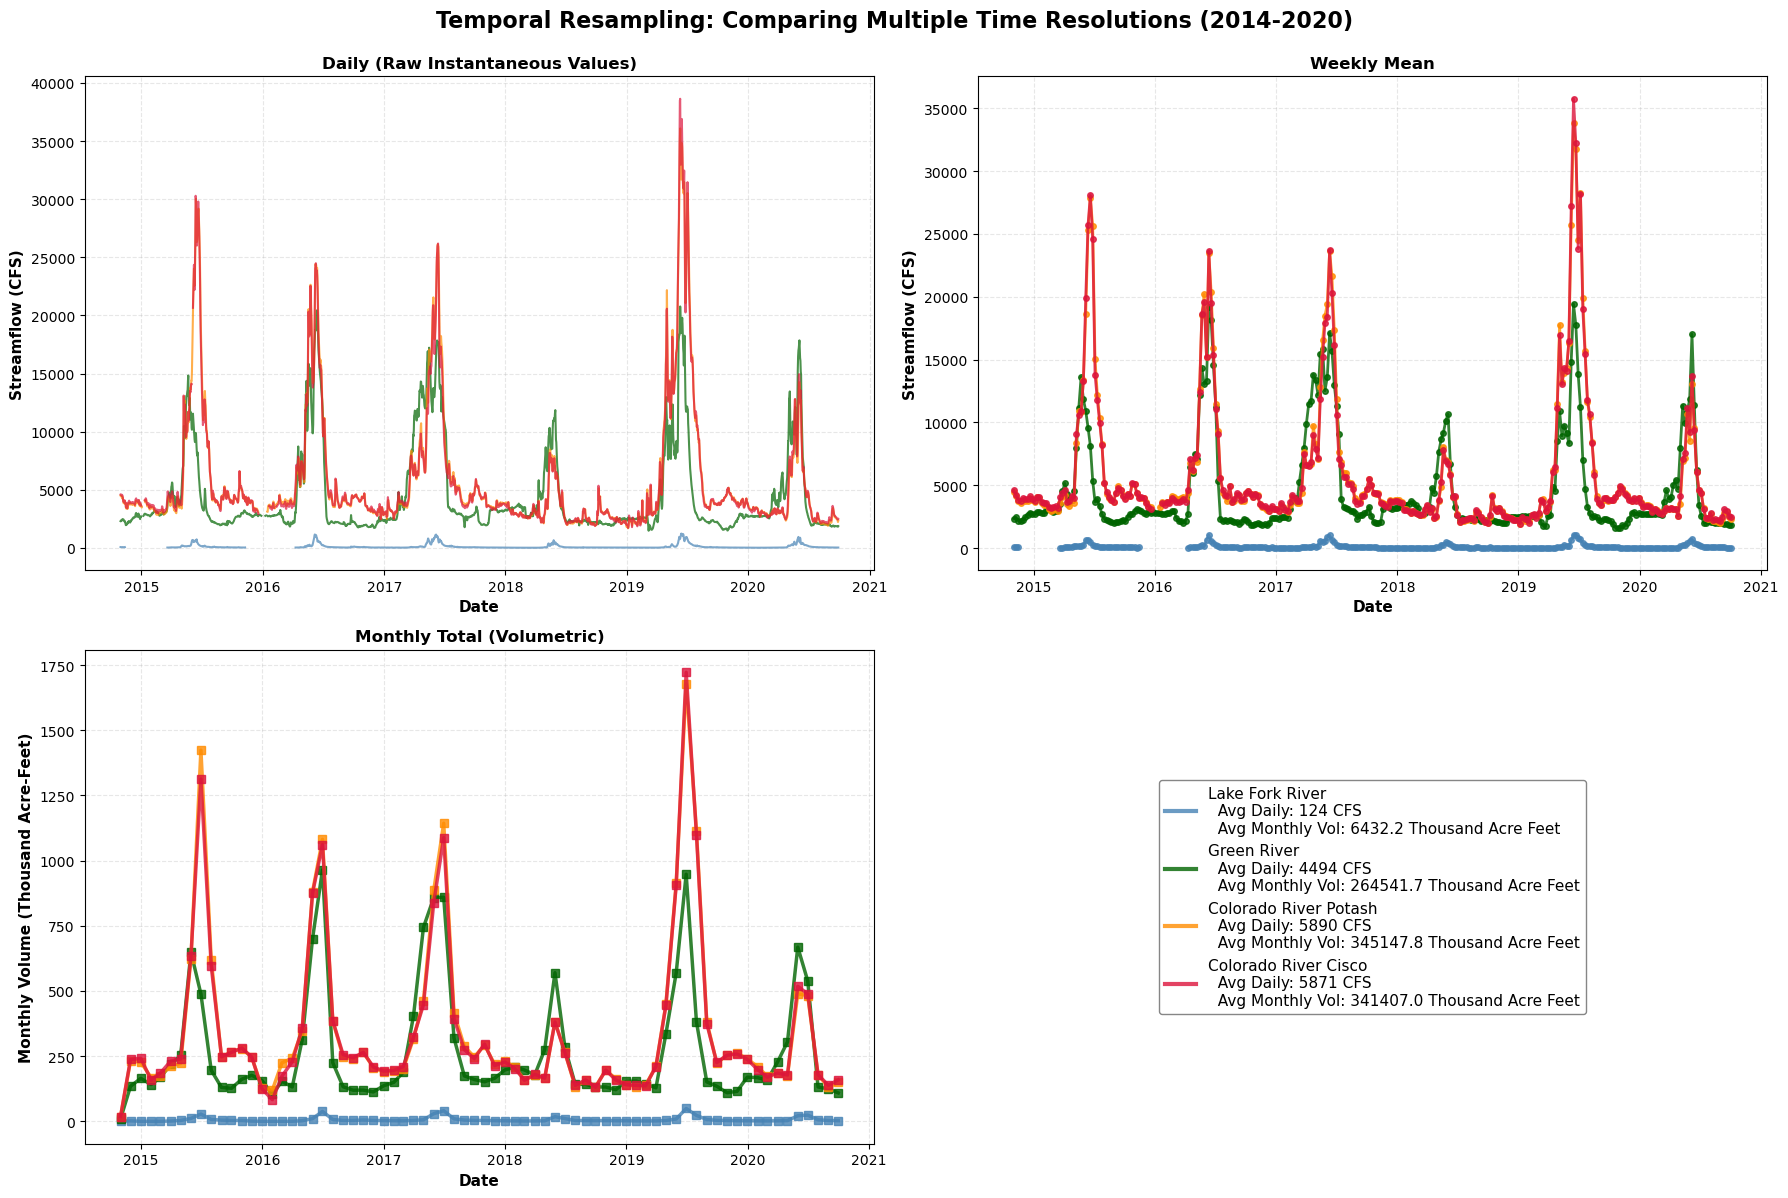

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Temporal Resampling: Comparing Multiple Time Resolutions (2014-2020)', 
             fontsize=16, fontweight='bold', y=0.995)

streams_list = list(data_6yr.keys())
colors_dict = {'Lake Fork River': 'steelblue', 'Green River': 'darkgreen', 
               'Colorado River Potash': 'darkorange', 'Colorado River Cisco': 'crimson'}

# ===== PANEL A: Daily (Raw) Data =====
ax_daily = axes[0, 0]
for label in streams_list:
    ax_daily.plot(data_6yr[label].index, data_6yr[label]['USGS_flow'], 
                  label=label, linewidth=1.5, color=colors_dict[label], alpha=0.7)
ax_daily.set_xlabel('Date', fontsize=11, fontweight='bold')
ax_daily.set_ylabel('Streamflow (CFS)', fontsize=11, fontweight='bold')
ax_daily.set_title('Daily (Raw Instantaneous Values)', fontsize=12, fontweight='bold')
ax_daily.grid(True, alpha=0.3, linestyle='--')
ax_daily.tick_params(axis='both', labelsize=10)

# ===== PANEL B: Weekly Mean =====
ax_weekly = axes[0, 1]
for label in streams_list:
    ax_weekly.plot(data_weekly[label].index, data_weekly[label]['USGS_flow'], 
                   label=label, linewidth=2, color=colors_dict[label], alpha=0.8, marker='o', markersize=4)
ax_weekly.set_xlabel('Date', fontsize=11, fontweight='bold')
ax_weekly.set_ylabel('Streamflow (CFS)', fontsize=11, fontweight='bold')
ax_weekly.set_title('Weekly Mean', fontsize=12, fontweight='bold')
ax_weekly.grid(True, alpha=0.3, linestyle='--')
ax_weekly.tick_params(axis='both', labelsize=10)

# ===== PANEL C: Monthly Volumetric (Total) =====
ax_monthly = axes[1, 0]
for label in streams_list:
    ax_monthly.plot(data_monthly_taf[label].index, data_monthly_taf[label]['USGS_flow'], 
                    label=label, linewidth=2.5, color=colors_dict[label], alpha=0.8, marker='s', markersize=6)
ax_monthly.set_xlabel('Date', fontsize=11, fontweight='bold')
ax_monthly.set_ylabel('Monthly Volume (Thousand Acre-Feet)', fontsize=11, fontweight='bold')
ax_monthly.set_title('Monthly Total (Volumetric)', fontsize=12, fontweight='bold')
ax_monthly.grid(True, alpha=0.3, linestyle='--')
ax_monthly.tick_params(axis='both', labelsize=10)

# ===== PANEL D: Legend Only =====
ax_legend = axes[1, 1]
ax_legend.axis('off')  # Turn off axis for legend panel

# Create custom legend with stream information
legend_labels = []
legend_handles = []
for label in streams_list:
    daily_mean = data_6yr[label]['USGS_flow'].mean()
    monthly_mean_vol = data_monthly_af[label].iloc[:, 0].mean()
    
    from matplotlib.lines import Line2D
    legend_line = Line2D([0], [0], color=colors_dict[label], linewidth=3, alpha=0.8)
    legend_labels.append(f'{label}\n  Avg Daily: {daily_mean:.0f} CFS\n  Avg Monthly Vol: {monthly_mean_vol:.1f} Thousand Acre Feet')
    legend_handles.append(legend_line)

ax_legend.legend(legend_handles, legend_labels, loc='center', fontsize=11, 
                framealpha=0.95, frameon=True, edgecolor='gray', fancybox=True)

plt.tight_layout()
plt.show()


In [36]:
# Compare and Contrast: Temporal Resampling Analysis
print("\n" + "="*80)
print("TEMPORAL RESAMPLING COMPARISON & ANALYSIS")
print("="*80)

for label in streams_list:
    print(f"\n{label.upper()}")
    print("-" * 80)
    
    daily = data_6yr[label]['USGS_flow']
    weekly = data_weekly[label]['USGS_flow']
    monthly = data_monthly_taf[label]['USGS_flow']
    
    print(f"\nDaily (CFS):")
    print(f"  Mean:        {daily.mean():>12.2f}")
    print(f"  Std Dev:     {daily.std():>12.2f}")
    print(f"  Min/Max:     {daily.min():>12.2f} / {daily.max():>12.2f}")
    print(f"  Coefficient of Variation: {(daily.std()/daily.mean())*100:>6.1f}%")
    
    print(f"\nWeekly Mean (CFS):")
    print(f"  Mean:        {weekly.mean():>12.2f}")
    print(f"  Std Dev:     {weekly.std():>12.2f}")
    print(f"  Min/Max:     {weekly.min():>12.2f} / {weekly.max():>12.2f}")
    print(f"  Coefficient of Variation: {(weekly.std()/weekly.mean())*100:>6.1f}%")
    
    print(f"\nMonthly Volume (Million CF):")
    print(f"  Mean:        {monthly.mean():>12.2f}")
    print(f"  Std Dev:     {monthly.std():>12.2f}")
    print(f"  Min/Max:     {monthly.min():>12.2f} / {monthly.max():>12.2f}")
    print(f"  Coefficient of Variation: {(monthly.std()/monthly.mean())*100:>6.1f}%")
    
    # Calculate reduction in variance from daily to weekly
    variance_reduction = ((daily.std() - weekly.std()) / daily.std()) * 100
    print(f"\nVariance Reduction (Daily to Weekly): {variance_reduction:.1f}%")

print("\n" + "="*80)
print("KEY OBSERVATIONS:")
print("="*80)
print("""
1. TEMPORAL SMOOTHING: Resampling to weekly and monthly averages reduces
   high-frequency noise, making long-term trends more visible.

2. VARIABILITY: Daily data shows the highest variability (noise), while monthly
   aggregation reveals seasonal patterns and long-term trends more clearly.

3. STREAM BEHAVIOR: 
   - Mountain streams (Lake Fork, Green River) show higher flows with more 
     seasonal variation
   - Lower elevation/damned rivers (Colorado) show more regulated, stable flows

4. UNITS & SCALES: Converting instantaneous values (CFS) to volumetric totals
   (Million CF) helps engineers assess actual water availability and storage needs.

5. ENGINEERING IMPLICATIONS: Weekly means are useful for operational decisions,
   while monthly volumes inform seasonal water planning and allocation.
""")



TEMPORAL RESAMPLING COMPARISON & ANALYSIS

LAKE FORK RIVER
--------------------------------------------------------------------------------

Daily (CFS):
  Mean:              123.93
  Std Dev:           192.95
  Min/Max:            17.75 /      1234.06
  Coefficient of Variation:  155.7%

Weekly Mean (CFS):
  Mean:              122.85
  Std Dev:           186.75
  Min/Max:            20.51 /      1037.29
  Coefficient of Variation:  152.0%

Monthly Volume (Million CF):
  Mean:                6.43
  Std Dev:             9.90
  Min/Max:             0.00 /        49.04
  Coefficient of Variation:  153.9%

Variance Reduction (Daily to Weekly): 3.2%

GREEN RIVER
--------------------------------------------------------------------------------

Daily (CFS):
  Mean:             4493.62
  Std Dev:          3912.45
  Min/Max:          1484.36 /     20776.04
  Coefficient of Variation:   87.1%

Weekly Mean (CFS):
  Mean:             4464.10
  Std Dev:          3842.16
  Min/Max:          1599.85